# 18-1. 들어가며

OCR(Optical Character Recognition, 광학 문자 인식)에 대해서 한 번씩은 들어보셨을 겁니다. 문자를 읽는 기술인 OCR은 산업적으로 매우 유용한 기술입니다. 딥러닝이 도입된 이후 OCR 기술이 획기적으로 개선되어 많은 산업 도메인에 유용하게 사용될 수 있는 가능성이 열리고 있습니다. 아래 링크의 글을 읽어 보면서 OCR 기술의 용도에 대해 생각해 봅시다.

- 4차 산업 고도화의 '촉매'가 되는 OCR

Q1. 위 글에서 소개되는 다양한 OCR 기술 활용 사례를 정리해 보세요.
A1.

- 우편번호 추출을 통한 우편물 관리
- 자동차 번호판 인식
- 모바일 기기를 사용한 명함 인식
- 신용카드 읽기를 이용한 결제 서비스
- 컨테이너 일련번호 인식을 이용한 스마트 선박 시스템

그렇다면 OCR이 어떻게 문자를 찾고 읽어내는지 궁금증이 생길 수 있습니다.

이번 시간에는 OCR이 어떻게 이뤄지는지 배워보고 이 OCR을 간단하게 활용해 보는 시간을 갖도록 하겠습니다.

### 실습목표
---
- OCR의 과정을 이해합니다.
- 문자인식 결과의 표현방식을 이해합니다.
- 파이썬을 통해 OCR을 사용할 수 있습니다.

### 학습 목차
---
1. 들어가며
2. 기계가 읽을 수 있나요?
3. 어떤 과정으로 읽을까요?
4. 딥러닝 문자인식의 시작
5. 사진 속 문자 찾아내기 - detection
6. 사진 속 문자 읽어내기 - recognition
7. keras-ocr 써보기
8. 테서랙트 써보기
9. 프로젝트 : 다양한 OCR 모델 비교하기

### 준비물
---
개인 실습환경에 따라 필요한 경로를 지정, 디렉토리를 생성해 주세요.

- mkdir -p ~/aiffel/ocr_python

# 18-2. 기계가 읽을 수 있나요?

사람이 문자를 읽으려면 어떤 과정을 거칠까요? 문자가 있다는 것을 1)인식하고, 인식한 문자를 2)해독하는 과정을 거치는 것이 일반적인데요. 기계가 문자를 읽는 과정도 이와 다르지 않습니다. 컴퓨터 비전에서 사용하는 용어로 위의 두 단계를 번역하자면 문자의 존재를 1)Detection 하고, 어떤 문자인지 판독하는 2)Recognition 으로 나눌 수 있을 것입니다.

그런데 정말 기계가 사진 속 글자를 잘 읽을 수 있을지 의심이 가진 않으시나요? 그래서 구글의 클라우드 기반 OCR API를 한번 테스트해 보도록 하겠습니다. 아래 링크를 누르고 화면을 조금 내려가면 다음 화면을 만날 수 있습니다. 여기에 문자를 인식하려 하는 사진을 드래그 앤 드롭 해 보세요. 손쉽게 딥러닝 기반의 최신 OCR을 테스트해볼 수 있습니다.

- 구글 OCR API (https://cloud.google.com/vision)

어떤가요? 역시 구글의 기술력에 고개가 끄덕여지시나요? 아마 한글도 잘 인식될 것입니다. 다양하게 테스트해 보세요.

우리가 사용한 것은 구글 OCR API인데요. 이 API를 이용하여 어플리케이션을 만들 수 있습니다. 파이썬 코드로 호출해서 다시 한번 테스트해볼까요?

다음과 같이 진행해 봅시다.

> ❗ Google Cloud Platform 의 서비스를 이용하기 위해서는 계정에 해외에서 사용가능한 신용카드를 등록해야 합니다. 처음 등록하면 무료로 사용할 수 있는 $300 크레딧을 주어 바로 비용이 청구될 걱정은 없지만 혹시 카드가 없거나 번거롭다고 느끼시는 분이 있다면 이 스텝은 읽어만 보시고 넘어가셔도 무방합니다.

### STEP 1) 구글의 파이썬 API 인터페이스 모듈을 아래와 설치합니다.

클라우드 환경에는 이미 설치가 되어있으니 확인하고 넘어갑시다.

- pip install --upgrade google-api-python-client
- pip install google-cloud-vision

### STEP 2) Google Cloud Vision API 사용

아래 링크의 설명을 참고하여 서비스 계정 및 인증키를 생성합니다. 브라우저에서 다운로드한 인증키는 my_google_api_key.json이라는 파일명으로 변경합시다. (파일은 프로젝트 이름으로 시작하는 파일명으로 자동 저장됩니다.)

- Google Cloud Vision API 키 생성 및 저장하기 (https://kimchangheon.tistory.com/166)

### STEP 3) API 사용 테스트

API를 활용하는 코드는 아래와 같습니다. 사용할 이미지를 cloud jupyter 를 이용하여 업로드 후 경로를 지정해 주세요

In [ ]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [ ]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path = # [[YOUR IMAGE FILE PATH]]   

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

> 이전에 구글 API 계정을 생성한 후 결제정보가 만료된 경우에는 위의 OCR API 호출 시 billing 관련 오류가 날 수 있습니다. 오류메시지 아래쪽의 링크를 따라가서 결제계정을 재활성화해야 API 호출이 가능합니다. 혹은 다른 계정을 생성하고 인증키를 다시 받는 방법도 있습니다.

어떤가요? 손쉽게 멋진 OCR 어플리케이션을 만들 수 있겠네요.

하지만 오늘 우리가 다룰 OCR 모델의 주인공은 구글의 API는 아닙니다.🤓 OCR에 대해 좀 더 자세히 알아보러 가 봅시다.

# 18-3. 어떤 과정으로 읽을까요?

구글 API에서는 문자의 영역을 사각형으로 표현하고 우측에 Block과 Paragraph로 구분해서 인식 결과를 나타내고 있었습니다. 구글 API가 이미지에 박스를 친 다음 박스별 텍스트의 내용을 알려준 것처럼, 문자 모델은 보통 두 단계로 이뤄집니다.

먼저 입력받은 사진 속에서 문자의 위치를 찾아냅니다. 이 과정을 Text Detection(문자검출) 이라고 합니다. 찾은 문자 영역으로부터 문자를 읽어내는 것은 Text Recognition(문자인식) 입니다. 예를 들어 아래 카카오의 OCR 모델은 먼저 문자가 있는 영역의 정보 (coord, Text Recognition)를 찾아내고, 각 영역에서 문자를 인식하고 있습니다. 이렇게 문자 인식 모델은 Text Detection과 Recognition 두 과정을 통해서 사진 속의 문자를 읽을 수 있게 됩니다.

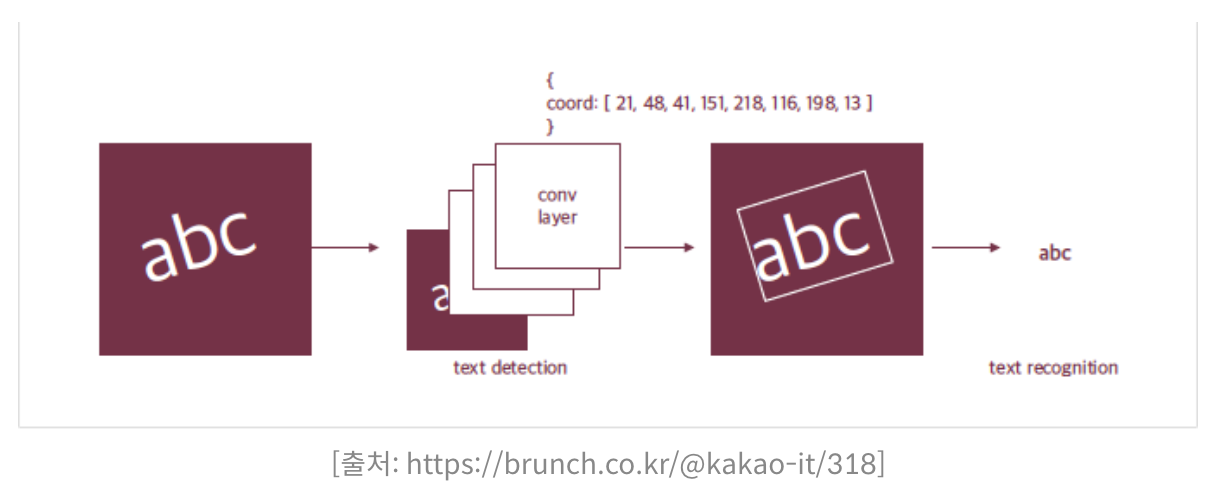

위 그림에서는 문자의 영역을 표현하는 방법으로 사각형의 네 꼭짓점 좌표를 알려 주는 방법을 제시하고 있습니다. 하지만 다른 도형이나 표현 방법을 사용할 수도 있을 것입니다. 이런 방법을 연구한 많은 논문들이 있습니다만, 아래에 그중 하나를 소개합니다.

- Scene Text Detection with Polygon Offsetting and Border Augmentation

Q2. 위에 소개한 논문에서 언급된 문자의 영역을 표현하는 방법에는 어떤 것이 있나요? 2페이지에 소개된 것들의 개념을 간단히 정리해 봅시다.

A2. 축에 정렬된 사각형인 Bounding box 그리고 돌아간 사각형 Oriented bounding box, 자유로운 사각형은 Quadrangle 그리고 다각형인 Polygon, Pixel 수준으로 영역을 표현한 Mask 등이 있습니다.

# 18-4. 딥러닝 문자인식의 시작

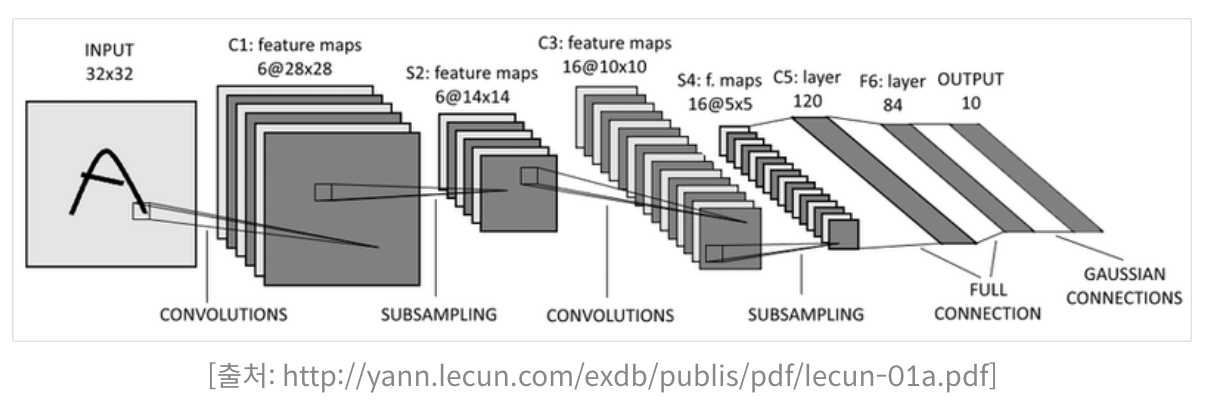

다들 딥러닝을 배우는 동안 MNIST 데이터셋을 여러 번 접하셨을 것입니다. 주로 0부터 9까지의 손으로 쓰인 숫자가 있는 이미지를 이미지 분류 문제로 딥러닝을 이용하여 풀어보는 데이터셋으로 사용하지요!

MNIST가 딥러닝 데이터셋의 "hello, world!"라면, LeNet은 CNN의 "hello, world!"라 할 수 있습니다. 1998년에 발표된 LeNet은 우편번호나 손글씨를 읽기 위해서 만들어졌습니다. 앞서 학습한 MNIST로 LeNet을 훈련시킨다면 우편번호를 읽을 수 있는 것이지요. 위 그림은 LeNet-5의 구조입니다. 요즘 나온 모델들을 생각한다면 구조가 상당히 간단하지요? Convolution 레이어와 최종 출력 레이어로 이뤄져 있습니다.

아래 이미지는 입력과 각 Layer의 활성화를 시각화한 LeNet의 MNIST 데모 이미지입니다. 우측 상단에서 인식 결과를 확인할 수 있습니다.

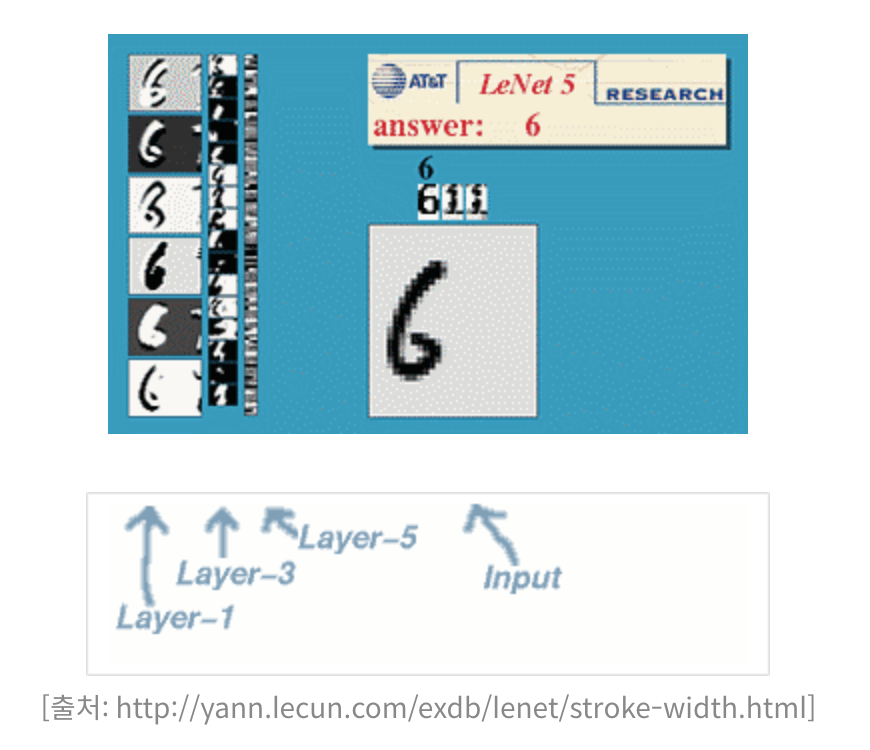

아래 데모 사이트에서 이렇게 간단한 구조로도 어려운 글자를 읽을 수 있는 딥러닝 분류 모델, LeNet을 확인해 보세요.

- Yann LeCun's Demo (http://yann.lecun.com/exdb/lenet/stroke-width.html)
- L12/1 LeNet from Berkely (https://www.youtube.com/watch?v=m3BrTjo2zUA)

하지만 이렇게 단순한 분류 모델만으로는 우리가 위에서 구글 API로 테스트해 보았던 복잡한 결과를 얻을 수 없습니다. 넓고 복잡한 이미지에서 글자 영역을 찾을 수 없을뿐더러 글자를 영역별로 잘라서 넣더라도 우리가 인식하기를 원하는 사진은 여러 글자가 모여있기 때문에 단순한 분류 문제로 표현이 불가능하지요.

- LeNet 데모페이지: Noise Resistance (http://yann.lecun.com/exdb/lenet/noisy-2.html)

Q3. LeNet 데모페이지에서 Noise Resistance의 예시를 보면 문자가 노이즈, 즉 잡음에 가려져도 문자를 잘 읽습니다. 이런 강건한(robust) 모델은 어떻게 만들 수 있을까요? 모델 강건성이란 무엇인지 찾아보고 방법을 고민해 봅시다.

A3. 가려진 케이스에 대한 데이터를 확보하거나 Augmentation을 통해서 해당 케이스에 대한 강건성을 확보합니다.

# 18-5. 사진 속 문자 찾아내기 - detection

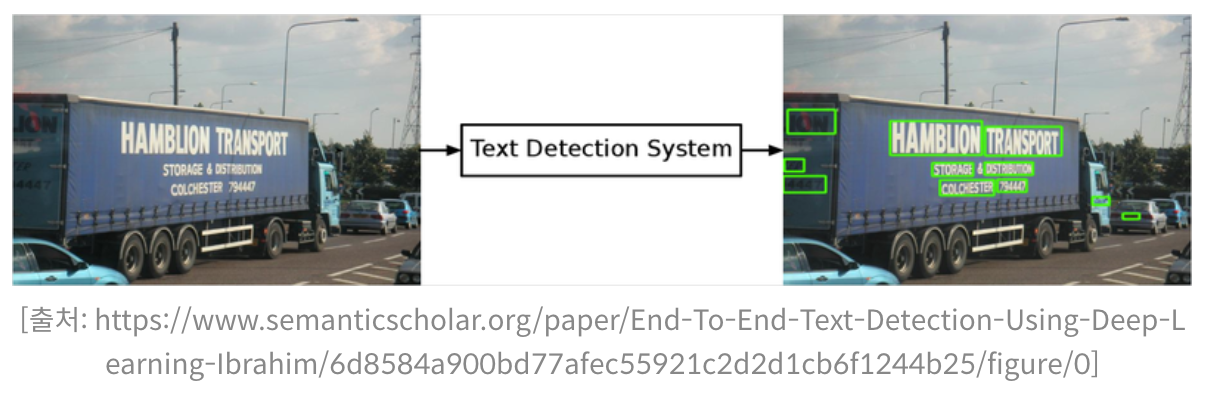

사진 속 문자를 찾아내는 최근의 딥러닝 모델은 일반적인 Object Detection(객체 인식) 방법으로 접근합니다. 이미지 속에서 물체를 찾아내는 딥러닝 모델에게 문자를 찾도록 학습을 시킨 것이죠. 물론 문자의 특성에 따라서 모델을 변경해 주기도 합니다.

딥러닝 기반 객체 검출 방법에는 Regression(회귀) 방식이나 Segmentation(세그멘테이션) 방식이 있습니다. Regression은 기준으로 하는 박스 대비 문자의 박스가 얼마나 차이가 나는지를 학습합니다. Segmentation은 픽셀 단위로 해당 픽셀이 문자를 표현하는지를 분류하는 문제(pixel-wise classification)라고 볼 수 있습니다. 객체 검출과 세그멘테이션에 대한 자세한 방법은 다른 강의에서 배우도록 합시다. 여기서는 문자를 찾아내는 딥러닝 모델이 우리가 흔히 들어본 Object Detection과 큰 차이가 없다는 것만 알아두셔도 됩니다.

- 딥러닝을 활용한 객체 탐지 알고리즘 이해하기 (https://blogs.sas.com/content/saskorea/2018/12/21/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84-%ED%99%9C%EC%9A%A9%ED%95%9C-%EA%B0%9D%EC%B2%B4-%ED%83%90%EC%A7%80-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0/)

Q4. 문자는 일반적인 객체와 어떤 특성이 다를까요? 아래 두 가지 사진을 두고 차이점을 찾아봅시다!

A4.

- 일반적인 객체는 물체에 따라서 크기가 일정한 특징을 가집니다. 하지만 문자는 영역과 배치가 자유로워 문자를 검출하기 위한 설정이 필요합니다.

- 또한 객체는 물체 간 거리가 충분히 확보되는 데에 반해 글자는 매우 촘촘하게 배치되어 있습니다.

Q5. 우리가 사진 속 문자를 검출할 때 어떤 단위로 문자를 검출해낼 수 있을까요? 그 단위를 생각해 봅시다.

A5. 문자, 단어, 줄, 단락 단위 등으로 검출해낼 수 있습니다.

# 18-6. 사진 속 문자 읽어내기 - recognition

문자 인식은 사진 속에서 문자를 검출해내는 검출 모델이 영역을 잘라서 주면 그 영역에 어떤 글자가 포함되어 있는지 읽어내는 과정입니다. 아래는 ICDAR15라는 OCR 데이터셋에서 단어 단위로 잘린 이미지입니다. 문자 인식 모델은 이렇게 작게 잘린 이미지가 들어오면 이미지 속에 어떤 단어가 포함됐는지 찾아내지요.

사실 이 과정은 이미지 문제보다는 자연어 처리에서 많은 영감을 받았습니다. 자연어 처리를 한다면 RNN이 떠오르실 텐데요. 이미지 내의 문자 인식 모델의 기본적인 방법 중 하나가 바로 CNN과 RNN을 결합한 CRNN 모델입니다. 이미지 내의 텍스트와 연관된 특징을 CNN을 통해 추출한 후에 스텝 단위의 문자 정보를 RNN으로 인식하는 것이지요.

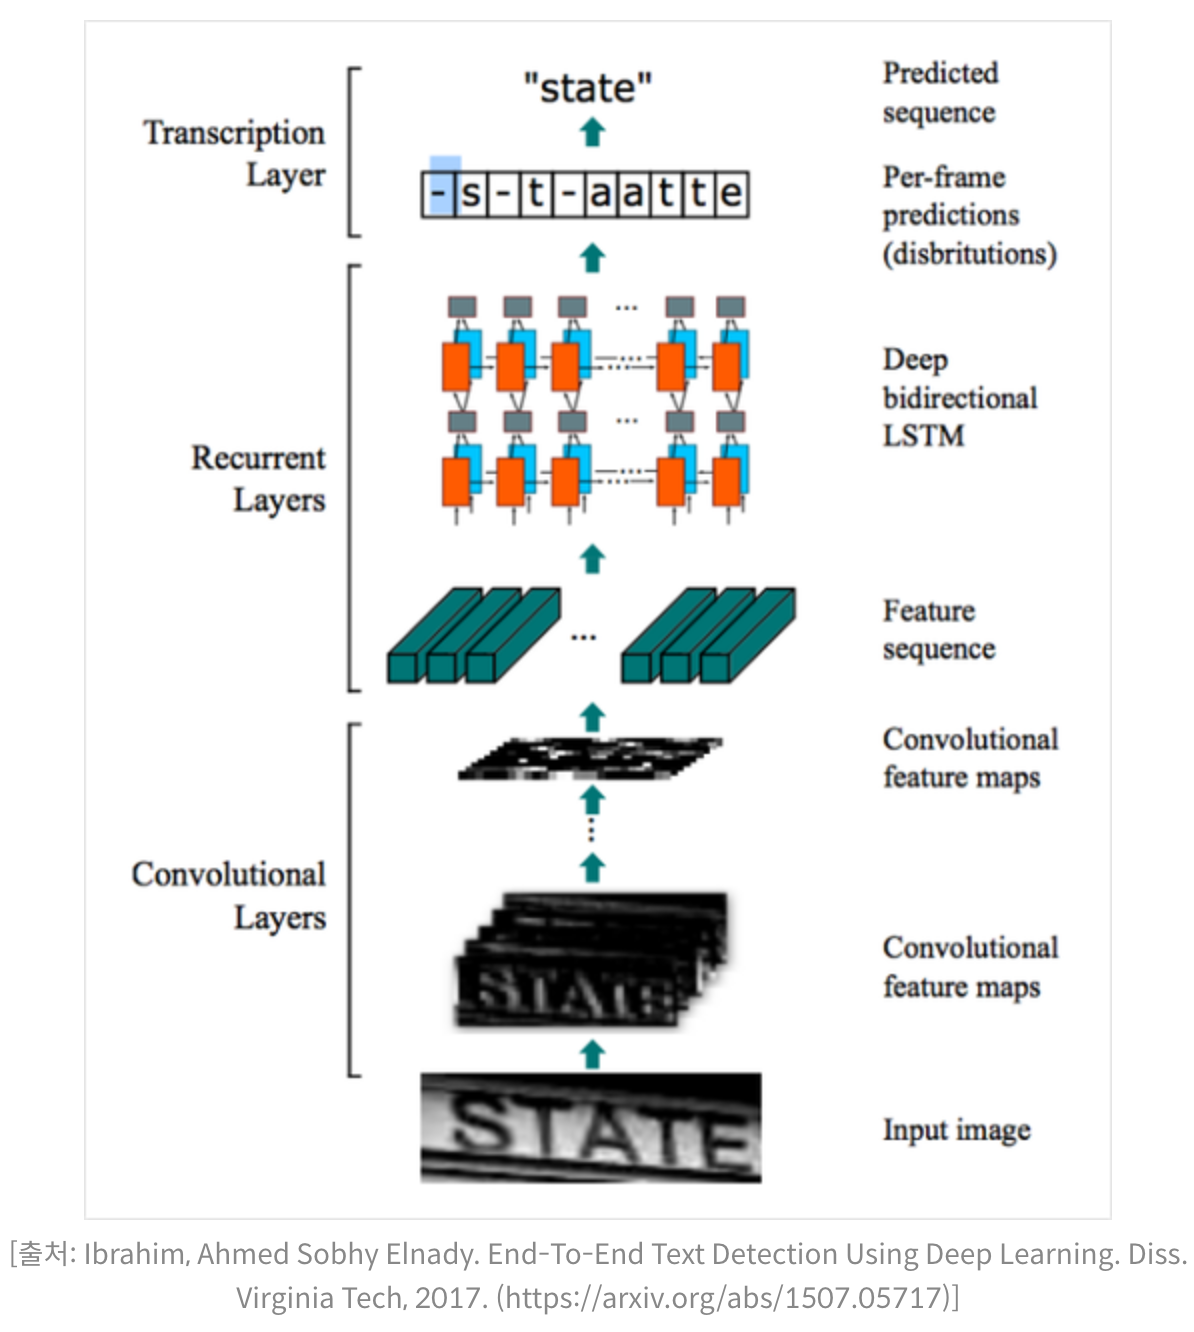

이렇게 검출 결과로부터 인식 모델을 통해 문자를 인식하고 나면 구글 API의 결과처럼 사진 속 영역에 표시를 하고 그 영역에 어떤 문자가 적혀있는지 알 수 있는 OCR 시스템이 됩니다.

Q6. Detection, Recognition 모델만으로는 단어별 문자를 인식할 수는 있어도 사람이 의미를 가지고 읽어내는 문단("Paragraph") 또는 블록("Block") 정보를 알 수 없을 것 같은데 구글은 이를 어떻게 풀고 있을까요? 자신만의 방법을 상상해 봅시다. 딥러닝을 적용해도 되고 간단한 Rule을 적용한 로직이어도 됩니다.

A6.

- 이미지 내에서 검출된 단어 영역의 위치정보를 기준으로 분리해낼 수 있을 것 같습니다.

- X,Y 축으로 L2 Distance가 일정 이내인 단어 또는 문자들의 그룹을 만들어 단락으로 만들어낼 수 있습니다.

이상으로 OCR에서 고려해야 할 기술적 단계들의 개요만 아주 간단히 짚어 보았습니다. OCR은 이미 실용적인 단계로의 연구가 많이 진척되어, 실전 레벨의 구체적인 정보를 접하는 것이 훨씬 도움이 될 것입니다.

그래서 OCR 영역에서 아주 도움이 될만한 영상을 권해 드립니다. 둘 다 한국어 영상이라 부담 없이 보실 수 있습니다. 네이버 이활석님의 데뷰 2018 발표 영상은 네이버 OCR 팀의 값진 연구 성과와 그동안의 생생한 경험을 통해 OCR 분야에 대한 구체적인 안내를 얻을 수 있는 아주 훌륭한 자료입니다. 꼭 시청하시기를 권해 드립니다.

엄태웅님의 영상은 이활석님의 네이버 데뷰 2018 영상을 기반으로 정리한 자료에 본인만의 개념적인 설명을 곁들여 OCR의 접근 방식에 대해 설명해 주십니다. 함께 보시면 도움이 될 것입니다.

- 네이버 데뷰 2018, 이활석님의 CRAFT 모델소개와 연구 경험 (https://tv.naver.com/v/4578167)

- Terry TaeWoong Um님의 사진 속 글자 읽기, OCR (Optical character recognition) (https://www.youtube.com/watch?v=ckRFBl_XWFg)

# 18-7. keras-ocr 써보기

위에서 구글 API를 쓰듯이 OCR을 데모로 써볼 수 있지만 직접 OCR 모델을 만들어 돌려보고 싶을 때는 어떻게 해야 할까요? 저희는 텐서플로우 기반의 모델을 주로 다뤄왔으니 텐서플로우를 기반으로 모델을 구현해서 OCR을 직접 돌려보도록 하겠습니다.

keras-ocr은 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR을 할 수 있게 해줍니다. 공식 문서에도 나와 있듯, 검출 모델로는 네이버 데뷰 2018 영상에서 소개한 CRAFT(Character Region Awareness for Text Detection)를 사용하고, 인식 모델로는 앞에서 설명한 CRNN을 사용합니다.

keras-ocr 버전을 클라우드 쉘에서 확인해 봅시다.
- pip list | grep keras-ocr

필요한 라이브러리인 keras_ocr 과 인식 결과의 시각화를 위한 matplotlib.pyplot 를 불러옵니다.

keras_ocr.pipeline.Pipeline() 는 인식을 위한 파이프라인을 생성하는데 이때 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러오게 됩니다. 검출기와 인식기를 위한 가중치 하나씩을 불러오겠지요.

- keras_ocr 공식문서 (https://keras-ocr.readthedocs.io/en/latest/index.html)

In [1]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


만들어둔 파이프라인의 recognize() 에 이미지를 몇 개 넣어줍니다.

이미지 소스의 url을 사용할 건데요. 이미지는 https://unsplash.com/s/photos/text 에서 가져왔습니다.

In [2]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

이제 인식된 결과를 pyplot으로 시각화를 해봅니다.

사용이 매우 간단합니다! 내부적으로 recognize() 는 검출기와 인식기를 두고, 검출기로 바운딩 박스(bounding box, 문자가 있는 영역을 표시한 정보)를 검출한 뒤, 인식기가 각 박스로부터 문자를 인식하는 과정을 거치도록 합니다.

keras-ocr 파이프라인 (https://github.com/faustomorales/keras-ocr/blob/master/keras_ocr/pipeline.py)

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


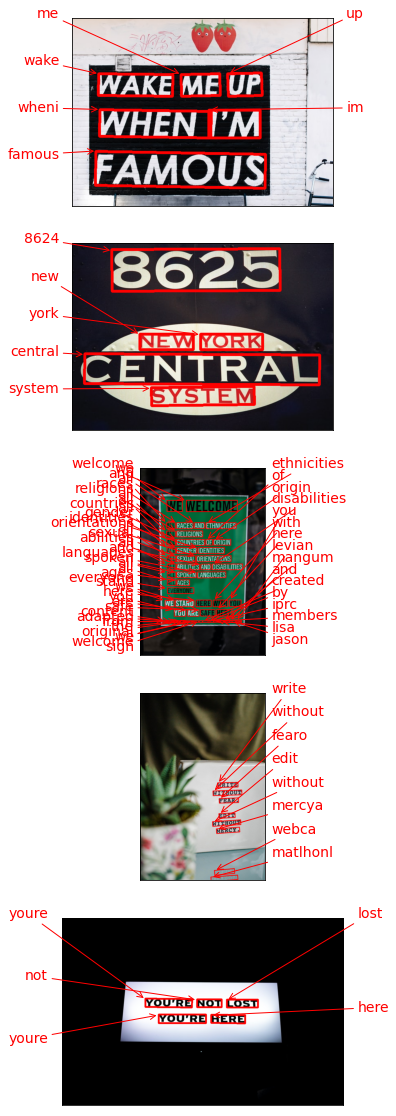

In [3]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

(주의사항)
keras-ocr은 한글 데이터셋으로 훈련이 되어있지 않은 모델입니다. 한글 텍스트의 detection은 정상적으로 진행되더라도 recognition 결과가 엉뚱하게 나올 수 있음에 주의해 주세요.

- korean language support 이슈 (https://github.com/faustomorales/keras-ocr/issues/101)

# 18-8. 테서랙트 써보기

이번에는 테서랙트(Tesseract) 라이브러리로 이미지에서 문자를 인식해 보겠습니다. 테서랙트는 구글에서 후원하는 OCR 오픈소스 라이브러리로 현재는 버전 4와 Tesseract.js등으로 확장되는 등 많은 곳에서 사용되고 있습니다. 버전 4에서는 LSTM이 엔진에 추가되었고 현재 한국어를 포함한 116 개 국어를 지원하고 있습니다.

오픈소스라는 점은 여러분들이 원하는 프로젝트에 활용하기 쉽다는 것을 뜻하니, 직접 해 보면서 익혀두면 나중에 간단한 OCR 모델이 필요할 때 빠르게 활용할 수 있을 겁니다.

### 1) 테서랙트 설치하기
---
클라우드 쉘에서 아래 코드를 사용해 테서랙트 관련 패키지들을 설치해 주세요.

- sudo apt install tesseract-ocr
- sudo apt install libtesseract-dev

### 2) 테서랙트 파이썬 wrapper 설치하기
---
Pytesseract는 OS에 설치된 테서랙트를 파이썬에서 쉽게 사용할 수 있도록 해주는 래퍼 라이브러리(wrapper library)입니다. 파이썬 내에서 컴퓨터에 설치된 테서랙트 엔진의 기능을 바로 쓸 수 있도록 해줍니다.

- Pytesseract (https://pypi.org/project/pytesseract/)

- 위키백과: 래퍼 라이브러리 (https://ko.wikipedia.org/wiki/%EB%9E%98%ED%8D%BC_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC)

클라우드 컨테이너에는 이미 설치가 되어 있으니 확인 후 진행해 주세요

- pip list | grep pytesseract

만약 설치가 안 되어 있다면 아래 명령어를 이용해 설치하세요.

- pip install pytesseract

### 3) 테서랙트로 문자 검출하고 이미지 자르기 (detection)
---
테서랙트를 사용하면 한 번에 이미지 내의 문자 검출과 인식을 할 수 있는데요.

우리는 OCR이 이뤄지는 전체 과정을 직접 거쳐보기 위해 검출을 먼저 해 봅시다.

In [4]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/test_image.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/aiffel/aiffel/ocr_python/test_image.png'

위에서 구현한 crop_word_regions() 함수는 여러분이 선택한 테스트 이미지를 받아서, 문자 검출을 진행한 후, 검출된 문자 영역을 crop한 이미지로 만들어 그 파일들의 list를 리턴하는 함수입니다.

기본적으로 pytesseract.image_to_data() 를 사용합니다. 파이썬에서 편하게 사용하기 위해서 pytesseract 의 Output 을 사용해서 결괏값의 형식을 딕셔너리(DICT) 형식으로 설정해 주게 됩니다. 이렇게 인식된 결과는 바운딩 박스의 left, top, width, height 정보를 가지게 됩니다. 바운딩 박스를 사용해 이미지의 문자 영역들을 파이썬 PIL(pillow) 또는 opencv 라이브러리를 사용해 잘라(crop)서 cropped_image_path_list에 담아 리턴하였습니다.

(주의) 위 코드에서 lang='kor' 로 바꾸면 에러가 발생합니다. 테서랙트의 언어팩을 설치해야 정상 동작하게 됩니다.

- sudo apt install tesseract-ocr-kor

언어팩 설치 관련해서는 이 페이지 (https://blog.daum.net/rayolla/1141)를 참고해 주세요.

### 4) 테서랙트로 잘린 이미지에서 단어 인식하기
---
이제 문자 인식을 해 볼 차례입니다. 검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결괏값으로 나오는 image_to_string()를 사용하게 됩니다.

이렇게 인식된 결과가 실제 이미지와 맞는지 확인해 봅시다.

In [5]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

NameError: name 'cropped_image_path_list' is not defined

# 18-9. 프로젝트 : 다양한 OCR모델 비교하기

우리는 지금까지 Google OCR API, keras-ocr, Tesseract 이상 3가지의 OCR 기능을 간단히 활용하여 보았습니다.

지금까지 살펴본 바로는 무료로 사용할 수 있는 기능들이지만 모두 준수한 성능을 갖추고 있었습니다. OCR 분야가 이미 실용적인 수준에까지 기술이 발전했기 때문에 이런 것들만 잘 활용해도 실전에 활용할 수 있는 좋은 서비스를 만들어 낼 수 있을 것도 같습니다. 그런데 과연 어떤 것을 사용하는 것이 좋을까요?

OCR 기술들이 실용적인 수준까지 꽤 발전했지만 그럼에도 불구하고 아직 완전한 수준은 아닙니다. 용도에 맞게 적절한 것을 선택하는 것도 중요한 일입니다. 그래서 오늘 다뤄본 위 3가지를 검증해 보는 프로젝트를 진행하겠습니다. 여러분은 OCR 기능을 활용한 서비스를 빠르게 개발해야 하는 임무를 맡은 엔지니어가 되어, 어떤 모듈을 도입하면 좋을지 기술검증을 하는 역할을 맡게 되었다고 가정합니다.

### Step1. 검증용 데이터셋 준비
---
OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.

가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.

### Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행
---
위 3가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다.

### Step3. 테스트 결과 정리
---
모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 시각화 방법이 함께 활용된다면 더욱 좋겠군요.

### Step4. 결과 분석과 결론 제시
---
우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다.
여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시합니다.
그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다